In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/retinopaty.png')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.title('Grayscaled image')

Text(0.5, 1.0, 'Grayscaled image')

### Contrast encreasing

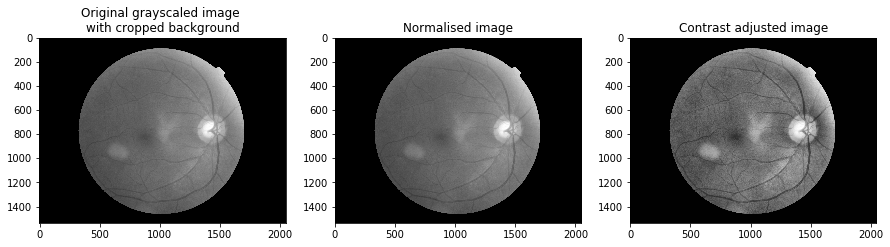

In [2]:
# 1. Thresholding using cv2.THRESH_OTSU to isolate the circular colored image of the 
# retina
ret, otsu_thresholded = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_OTSU)

# Cropp image background
img_with_cropped_bg = cv2.bitwise_and(img_grayscale, otsu_thresholded)

# 2. Normalising image by subtracting the minimum pixel intensity from each channel 
# and dividing by the mean pixel intensity to represent pixels in the range 0 to 1
img_normalized = np.zeros(img_with_cropped_bg.shape)
img_normalized = cv2.normalize(img_with_cropped_bg,  img_normalized, 0, 255, cv2.NORM_MINMAX)

# 3. Contrast adjustment using the contrast limited adaptive histogram equalization 
# (CLAHE) filtering algorithm
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
histogram_norm_img = clahe.apply(img_normalized)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.title('Original grayscaled image \nwith cropped background')
plt.imshow(img_with_cropped_bg, cmap=plt.cm.gray)
fig.add_subplot(1, 3, 2)
plt.title('Normalised image')
plt.imshow(img_normalized, cmap=plt.cm.gray)
fig.add_subplot(1, 3, 3)
plt.title('Contrast adjusted image')
plt.imshow(histogram_norm_img, cmap=plt.cm.gray)

### Image denoising

Text(0.5, 1.0, 'Median bluring')

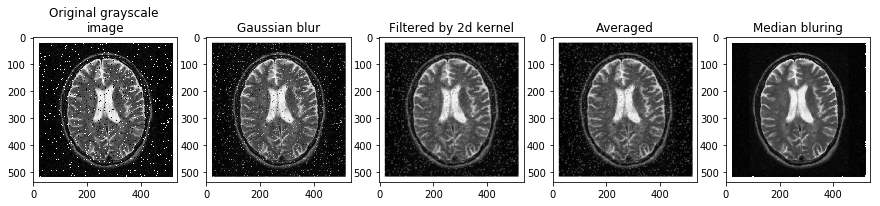

In [3]:
noicy_img = cv2.imread('./images/noisy_brain.jpg')
noicy_img_grayscale = cv2.cvtColor(noicy_img, cv2.COLOR_BGR2GRAY)

# Use GaussianBlur
noicy_img_blured = cv2.GaussianBlur(noicy_img_grayscale, (3, 3), 0)

# Use 2d kernel
kernel = np.ones((5,5),np.float32)/25
noicy_img_wth_kernel = cv2.filter2D(noicy_img,-1,kernel)

# Use averaging
noicy_img_averaged = cv2.blur(noicy_img_grayscale, (5,5))

# Use median bluring
noicy_img_median_blured = cv2.medianBlur(noicy_img_grayscale, 5)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 5, 1)
plt.imshow(noicy_img_grayscale, cmap=plt.cm.gray)
plt.title('Original grayscale \nimage')

fig.add_subplot(1, 5, 2)
plt.imshow(noicy_img_blured, cmap=plt.cm.gray)
plt.title('Gaussian blur')

fig.add_subplot(1, 5, 3)
plt.imshow(noicy_img_wth_kernel, cmap=plt.cm.gray)
plt.title('Filtered by 2d kernel')

fig.add_subplot(1, 5, 4)
plt.imshow(noicy_img_averaged, cmap=plt.cm.gray)
plt.title('Averaged')

fig.add_subplot(1, 5, 5)
plt.imshow(noicy_img_median_blured, cmap=plt.cm.gray)
plt.title('Median bluring')

### Adaptive image resizing

In [4]:
ret, thresh = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
cnt = max(contours, key = cv2.contourArea)

In [5]:
def resize_img_adaptively(img_gr, img_cnt, dim, interpolation):
    """
    img_gr - original image in grayscale
    img_cnt - max image contour
    """
    (x,y), radius = cv2.minEnclosingCircle(cnt)
            
    x = int(x); y = int(y); radius = int(radius)
    
    if x < radius:
        radius = x
    if y < radius:
        radius = y
    
    crop_img = img_gr[y - radius:y + radius, x - radius:x + radius]
    
    resized = cv2.resize(crop_img, dim, interpolation=interpolation)
    
    return resized

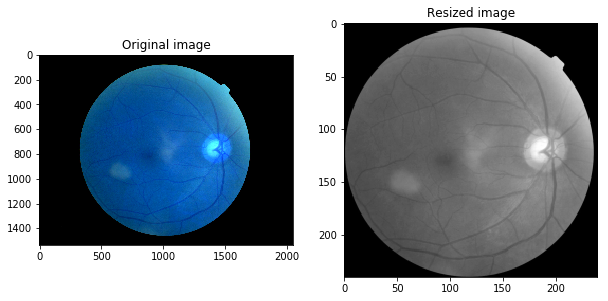

In [6]:
resized_img = resize_img_adaptively(img_grayscale, cnt, (240, 240), interpolation=cv2.INTER_AREA)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(img)

fig.add_subplot(1, 2, 2)
plt.title('Resized image')
plt.imshow(resized_img, cmap=plt.cm.gray)